In [1]:
from yahooquery import Ticker
import pandas as pd

ticker = "Reliance.NS"
ticker_obj = Ticker(ticker)
df = ticker_obj.history(period="1y").reset_index()
df = df[df['symbol'] == ticker]


In [2]:
print(df.head())       # First few rows
print(df.info())       # Data types and non-null counts
print(df.isnull().sum())  # Missing values


        symbol        date         open         high          low  \
0  Reliance.NS  2024-09-09  1466.500000  1469.925049  1455.599976   
1  Reliance.NS  2024-09-10  1460.500000  1472.050049  1457.574951   
2  Reliance.NS  2024-09-11  1463.050049  1468.750000  1447.550049   
3  Reliance.NS  2024-09-12  1457.000000  1486.000000  1445.875000   
4  Reliance.NS  2024-09-13  1476.400024  1483.150024  1469.500000   

         close    volume     adjclose  dividends  splits  
0  1462.449951   9010298  1456.632324        0.0     0.0  
1  1461.525024  10768260  1455.711060        0.0     0.0  
2  1451.500000   9760202  1445.725952        0.0     0.0  
3  1479.800049  22349376  1473.913330        0.0     0.0  
4  1472.625000   8711328  1466.766846        0.0     0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     251 non-null    object 
 1   d

In [3]:
print(df.describe())   # Mean, std, min, max, etc.


              open         high          low        close        volume  \
count   251.000000   251.000000   251.000000   251.000000  2.510000e+02   
mean   1344.540936  1356.083765  1332.799799  1343.929582  1.274840e+07   
std      96.535013    96.119967    96.602610    96.020301  6.110820e+06   
min    1132.199951  1171.250000  1114.849976  1161.900024  0.000000e+00   
25%    1258.450012  1270.150024  1243.875000  1254.200012  8.687712e+06   
50%    1340.000000  1363.199951  1335.000000  1343.900024  1.127056e+07   
75%    1423.950012  1431.950012  1410.699951  1422.799988  1.550369e+07   
max    1536.699951  1551.000000  1530.199951  1541.500000  3.775729e+07   

          adjclose   dividends      splits  
count   251.000000  251.000000  251.000000  
mean   1338.978513    0.021912    0.007968  
std      95.819756    0.347157    0.126239  
min    1157.277954    0.000000    0.000000  
25%    1249.210754    0.000000    0.000000  
50%    1338.553955    0.000000    0.000000  
75%    14

c:\Users\T8582\OneDrive - LTIMindtree\Desktop\Smart Finance Prediction Assistant\.venv\Lib\site-packages\matplotlib\dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')


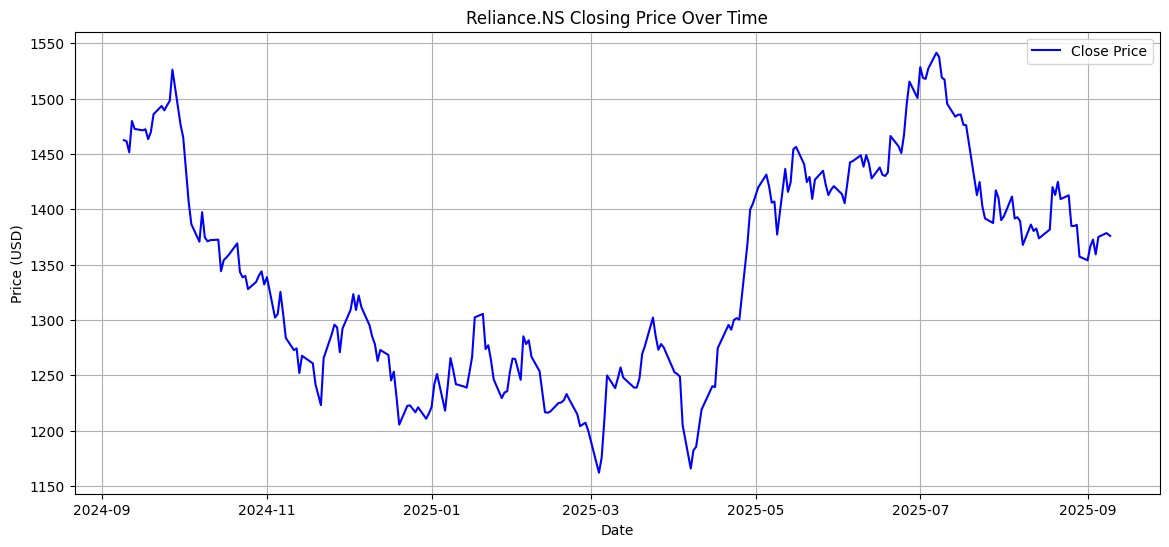

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')
plt.title(f"{ticker} Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()


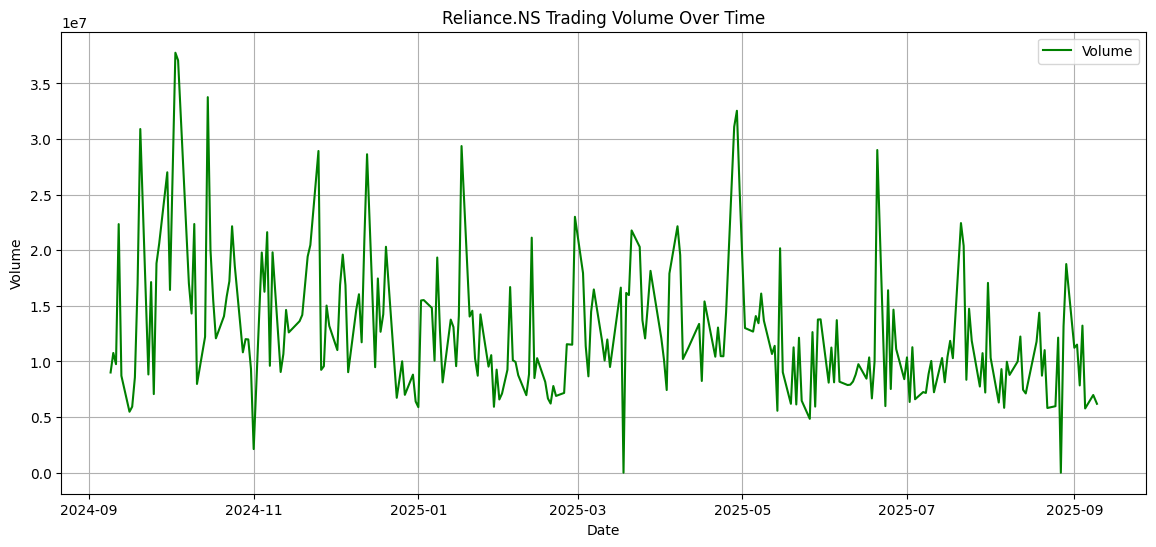

In [5]:
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['volume'], label='Volume', color='green')
plt.title(f"{ticker} Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.legend()
plt.show()


c:\Users\T8582\OneDrive - LTIMindtree\Desktop\Smart Finance Prediction Assistant\.venv\Lib\site-packages\matplotlib\dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')


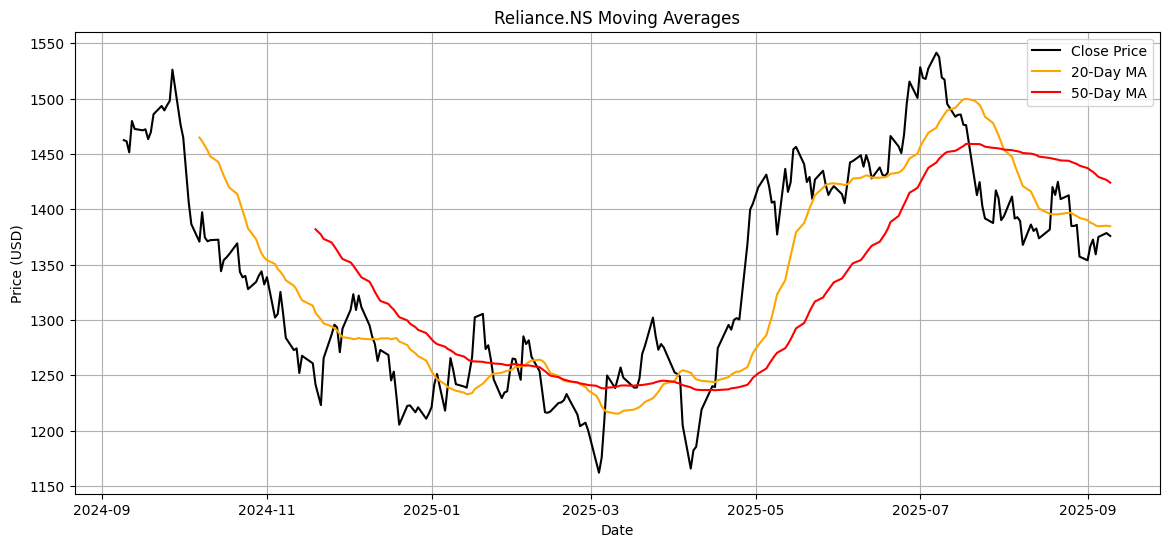

In [6]:
df['MA_20'] = df['close'].rolling(window=20).mean()
df['MA_50'] = df['close'].rolling(window=50).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['close'], label='Close Price', color='black')
plt.plot(df['date'], df['MA_20'], label='20-Day MA', color='orange')
plt.plot(df['date'], df['MA_50'], label='50-Day MA', color='red')
plt.title(f"{ticker} Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()


c:\Users\T8582\OneDrive - LTIMindtree\Desktop\Smart Finance Prediction Assistant\.venv\Lib\site-packages\matplotlib\dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')


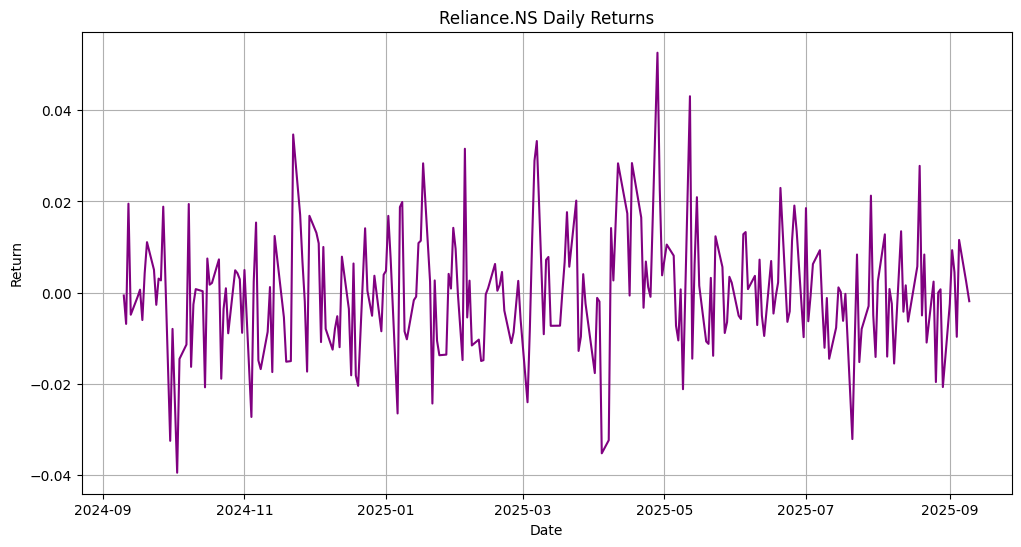

In [7]:
df['daily_return'] = df['close'].pct_change()

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['daily_return'], color='purple')
plt.title(f"{ticker} Daily Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid(True)
plt.show()


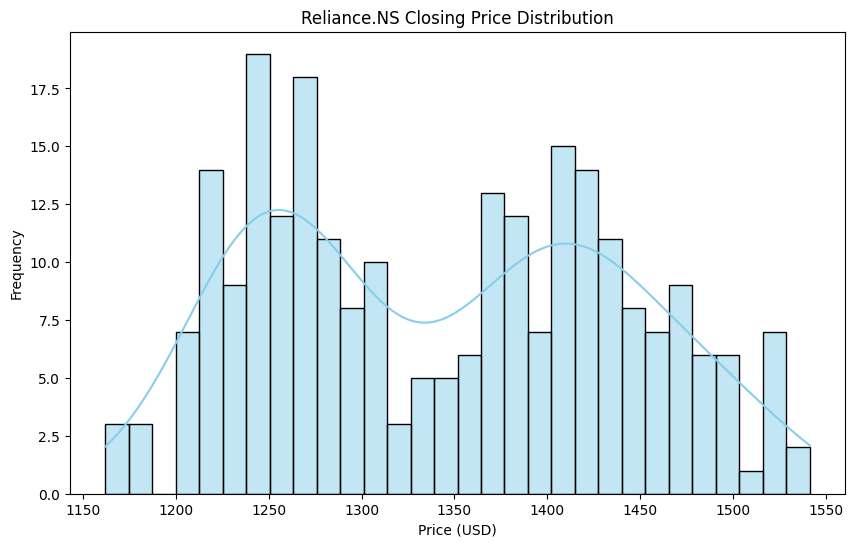

In [8]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['close'], bins=30, kde=True, color='skyblue')
plt.title(f"{ticker} Closing Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()


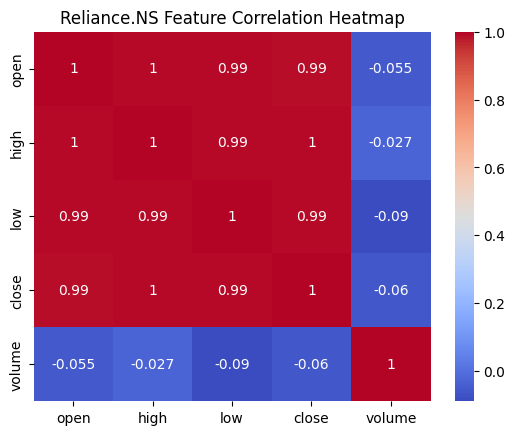

In [9]:
sns.heatmap(df[['open', 'high', 'low', 'close', 'volume']].corr(), annot=True, cmap='coolwarm')
plt.title(f"{ticker} Feature Correlation Heatmap")
plt.show()


In [10]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


In [11]:
import mplfinance as mpf

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df_candle = df[['open', 'high', 'low', 'close', 'volume']]
df_candle.index.name = 'Date'

mpf.plot(df_candle, type='candle', style='charles', title=f"{ticker} Candlestick Chart", volume=True)


ValueError: Cannot mix tz-aware with tz-naive values